# Sima Shafaei

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn as sk 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
data_df = pd.read_csv('data.csv')
data_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [4]:
data_df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


number of samples in Class 0: 573518
number of samples in Class 1: 21694


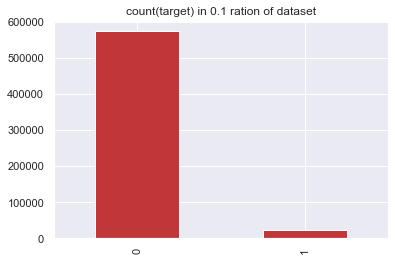

In [6]:
sns.set(palette="RdBu")
no_one = len(data_df[data_df['target'] == 1])
no_zero = len(data_df[data_df['target'] == 0])
one_indices = data_df[data_df.target == 1].index
zero_indices = data_df[data_df.target == 0].index

print("number of samples in Class 0:",no_zero)
print("number of samples in Class 1:",no_one)
target_count=data_df.target.value_counts()
target_count.plot(kind='bar', title ='count(target)')

number of samples in Class 0: 114712
number of samples in Class 1: 4331


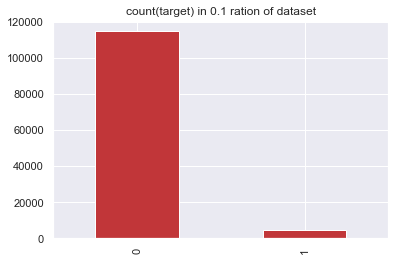

In [59]:
X=np.array(data_df.drop(['target'],axis=1))
y=np.array(data_df['target'])
X_r1, X_ratio, y_r1, y_ratio = train_test_split(X, y, test_size=0.2)
target_count[1]=np.count_nonzero(y_ratio)
target_count[0]=len(y_ratio)-target_count[1]
target_count.plot(kind='bar', title ='count(target) in 0.2 ration of dataset')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

# Random Under Sampling

number of samples in Class 0: 21694
number of samples in Class 1: 21694


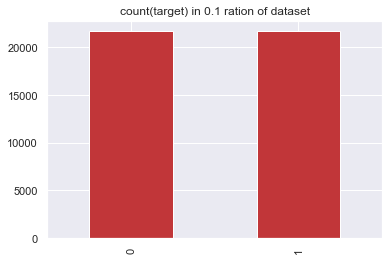

In [15]:
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=42, replacement=False)
X_rus, y_rus = rus.fit_resample(X, y)
target_count[1]=np.count_nonzero(y_rus)
target_count[0]=len(y_rus)-target_count[1]
target_count.plot(kind='bar', title ='count(target)')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

Accuracy: 0.4930859645079511
Precision: 0.4930859645079511
Recall: 1.0


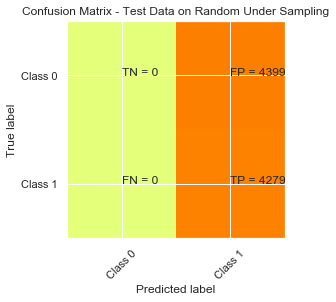

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Random Under Sampling')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Random Over Sampling

number of samples in Class 0: 573518
number of samples in Class 1: 573518


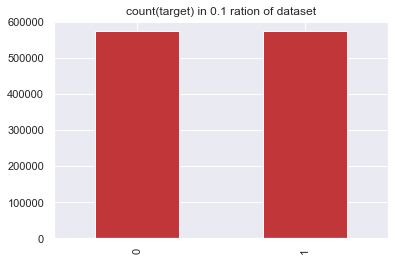

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
target_count[1]=np.count_nonzero(y_ros)
target_count[0]=len(y_ros)-target_count[1]
target_count.plot(kind='bar', title ='count(target)')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

Accuracy: 0.5055272701911006
Precision: 0.5036065224057704
Recall: 0.6596692223056637


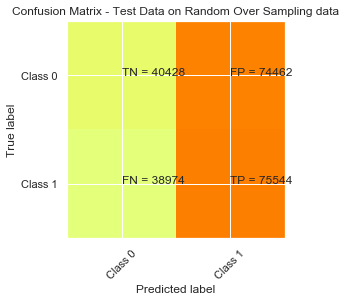

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2,random_state=109)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Random Over Sampling data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Under-Sampling TomekLinks

number of samples in Class 0: 561433
number of samples in Class 1: 21694


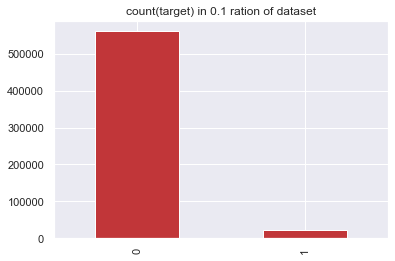

In [27]:
from imblearn.under_sampling import TomekLinks
tmlink = TomekLinks(sampling_strategy='auto')
X_tmlink, y_tmlink = tmlink.fit_resample(X, y)
target_count[1]=np.count_nonzero(y_tmlink)
target_count[0]=len(y_tmlink)-target_count[1]
target_count.plot(kind='bar', title ='count(target)')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

Accuracy: 0.9635587261845557
Precision: 0.0
Recall: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


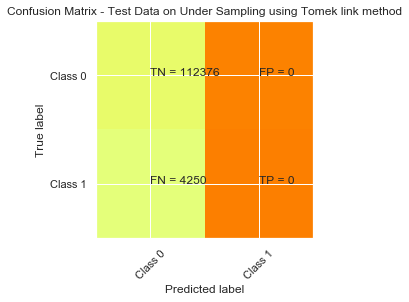

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_tmlink, y_tmlink, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_tmlink = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Under Sampling using Tomek link method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_tmlink[i][j]))
plt.show()

# SMOTE Over Sampling

number of samples in Class 0: 573518
number of samples in Class 1: 573518


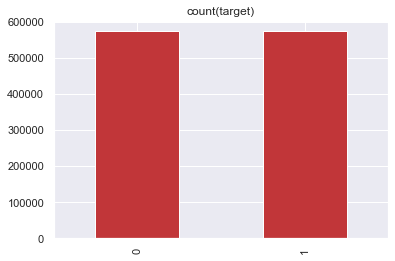

In [31]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
X_somte, y_smote = smote.fit_resample(X, y)
target_count[1]=np.count_nonzero(y_smote)
target_count[0]=len(y_smote)-target_count[1]
target_count.plot(kind='bar', title ='count(target)')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

Accuracy: 0.5015146562057318
Precision: 0.5015146562057318
Recall: 1.0


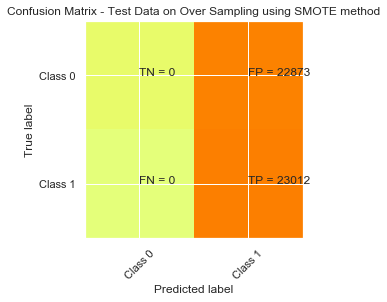

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_somte, y_smote, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_smote = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Over Sampling using SMOTE method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_smote[i][j]))
plt.show()

# Cluster Centroids Under Sampling

number of samples in Class 0: 4331
number of samples in Class 1: 4331


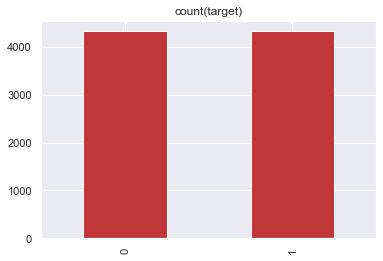

In [60]:
from imblearn.under_sampling import ClusterCentroids
ccus=ClusterCentroids()
X_ccus, y_ccus = ccus.fit_resample(X_ratio, y_ratio)
target_count[1]=np.count_nonzero(y_ccus)
target_count[0]=len(y_ccus)-target_count[1]
target_count.plot(kind='bar', title ='count(target)')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

Accuracy: 0.47547605308713214
Precision: 0.4830097087378641
Recall: 0.6885813148788927


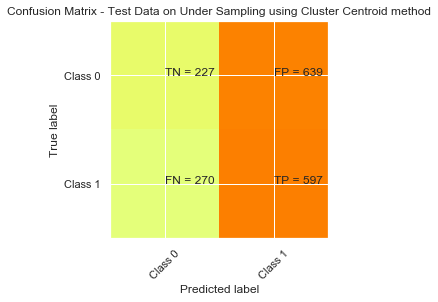

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_ccus, y_ccus, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_ccus = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Under Sampling using Cluster Centroid method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_ccus[i][j]))
plt.show()

# Over Sampling -> under Sampling (SMOTE, Tomek)

number of samples in Class 0: 555420
number of samples in Class 1: 555420


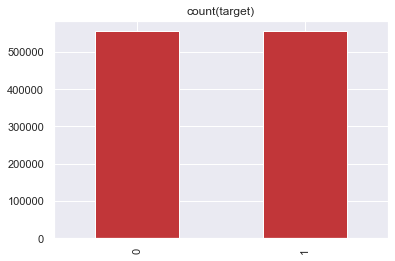

In [56]:
smote=SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
X_somte, y_smote = smote.fit_resample(X, y)
tmlink = TomekLinks(sampling_strategy='all')
X_smote_tmlink, y_smote_tmlink = tmlink.fit_resample(X_somte, y_smote)
target_count[1]=np.count_nonzero(y_smote_tmlink)
target_count[0]=len(y_smote_tmlink)-target_count[1]
target_count.plot(kind='bar', title ='count(target)')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

Accuracy: 0.5146825825501422
Precision: 0.5107021103618837
Recall: 0.6737235816321933


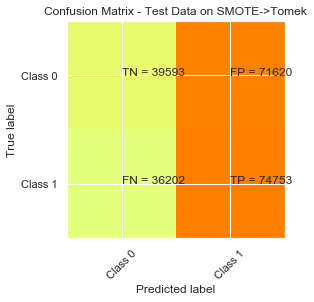

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_tmlink, y_smote_tmlink, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_smote_tkm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on SMOTE->Tomek')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_smote_tkm[i][j]))
plt.show()

# SMOTE Over Sampling on ration DS

number of samples in Class 0: 114712
number of samples in Class 1: 114712


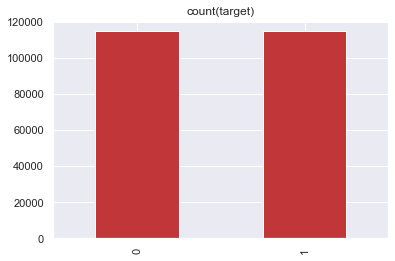

In [70]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
X_somte, y_smote = smote.fit_resample(X_ratio, y_ratio)
target_count[1]=np.count_nonzero(y_smote)
target_count[0]=len(y_smote)-target_count[1]
target_count.plot(kind='bar', title ='count(target)')
print("number of samples in Class 0:",target_count[0])
print("number of samples in Class 1:",target_count[1])

Accuracy: 0.4992481203007519
Precision: 0.4992481203007519
Recall: 1.0


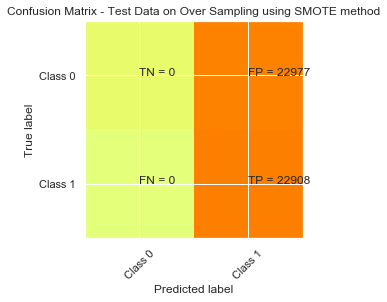

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_somte, y_smote, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_smote_ratio = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Over Sampling using SMOTE method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_smote_ratio[i][j]))
plt.show()

# using xgboos Classifivation

## random under sampling

Accuracy: 0.5954136897902742
Precision: 0.6070492974517743
Recall: 0.5780045351473923


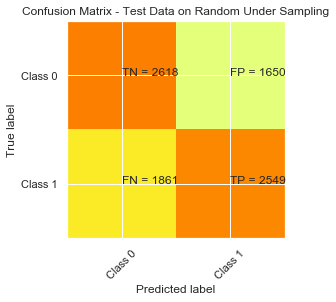

In [84]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Random Under Sampling')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## random over sampling

Accuracy: 0.6053712163481657
Precision: 0.6098678123540028
Recall: 0.5813496568225083


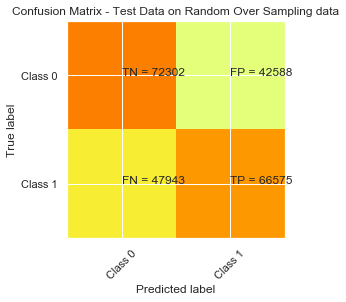

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2,random_state=109)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Random Over Sampling data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Tomek

Accuracy: 0.9619896078061496
Precision: 0.0
Recall: 0.0


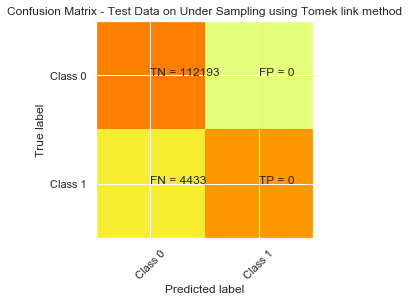

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_tmlink, y_tmlink, test_size=0.2)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_tmlink = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Under Sampling using Tomek link method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_tmlink[i][j]))
plt.show()

## SMOTE on 20% of Dataset

Accuracy: 0.9806036831208456
Precision: 1.0
Recall: 0.9607237422771403


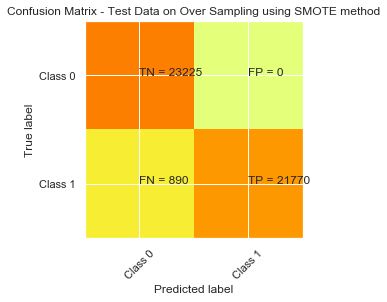

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_somte, y_smote, test_size=0.2)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_smote = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Over Sampling using SMOTE method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_smote[i][j]))
plt.show()

## Cluster Centroid

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


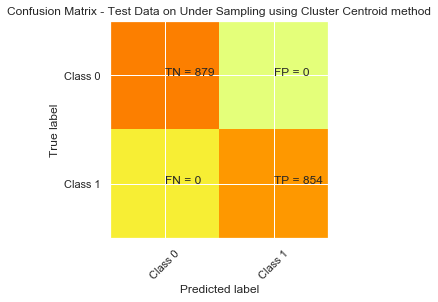

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_ccus, y_ccus, test_size=0.2)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_ccus = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Under Sampling using Cluster Centroid method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_ccus[i][j]))
plt.show()

## SMOTE -> Tomek

Accuracy: 0.9802176731122394
Precision: 1.0
Recall: 0.9604705755376272


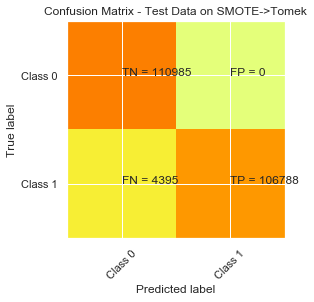

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_tmlink, y_smote_tmlink, test_size=0.2)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_smote_tkm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on SMOTE->Tomek')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_smote_tkm[i][j]))
plt.show()

## SMOTE 2

Accuracy: 0.9810032780025109
Precision: 1.0
Recall: 0.9619684262887362


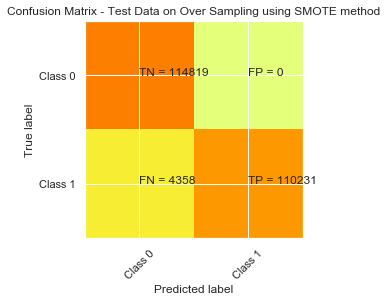

In [96]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
X_somte_all, y_smote_all = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_somte_all, y_smote_all, test_size=0.2)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_smote = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on Over Sampling using SMOTE method')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_smote[i][j]))
plt.show()

## SMOTE -> TOMEK on 20% of dataset

Accuracy: 0.9801623083859333
Precision: 1.0
Recall: 0.9602072741493938


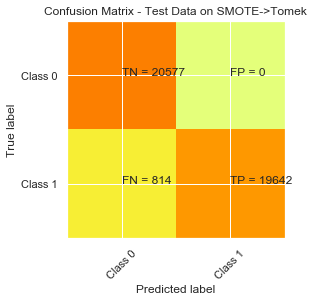

In [97]:
smote=SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
X_somte_ratio, y_smote_ratio = smote.fit_resample(X_ratio, y_ratio)
tmlink = TomekLinks(sampling_strategy='all')
X_smote_tmlink_ratio, y_smote_tmlink_ratio = tmlink.fit_resample(X_somte_ratio, y_smote_ratio)
X_train, X_test, y_train, y_test = train_test_split(X_smote_tmlink_ratio, y_smote_tmlink_ratio, test_size=0.2)
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
cm_smote_tkm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data on SMOTE->Tomek')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_smote_tkm[i][j]))
plt.show()